In [1]:
# Basic numerical & plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    balanced_accuracy_score,
    confusion_matrix
)

# Reproducibility
np.random.seed(42)

In [2]:
# Load Breast Cancer Wisconsin (Diagnostic) dataset
data = load_breast_cancer()

X = data.data
y = data.target

feature_names = data.feature_names
target_names = data.target_names

print("Dataset loaded")
print("Features shape:", X.shape)
print("Labels shape:", y.shape)
print("Classes:", target_names)

Dataset loaded
Features shape: (569, 30)
Labels shape: (569,)
Classes: ['malignant' 'benign']


In [3]:
# Train-test split (fixed for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (455, 30)
Test shape: (114, 30)


In [5]:
# Standardize features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Create DataFrame for easier analysis
df = pd.DataFrame(X_train_scaled, columns=feature_names)

print("DataFrame shape:", df.shape)
df.head()

DataFrame shape: (455, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-1.072001,-0.658425,-1.088080,-0.939274,-0.135940,-1.008718,-0.968359,-1.102032,0.281062,-0.113231,...,-1.034094,-0.623497,-1.070773,-0.876534,-0.169982,-1.038836,-1.078995,-1.350527,-0.352658,-0.541380
1,1.748743,0.066502,1.751157,1.745559,1.274468,0.842288,1.519852,1.994664,-0.293045,-0.320180,...,1.228342,-0.092833,1.187467,1.104386,1.517001,0.249655,1.178594,1.549916,0.191078,-0.173739
2,-0.974734,-0.931124,-0.997709,-0.867589,-0.613515,-1.138154,-1.092292,-1.243358,0.434395,-0.429247,...,-0.973231,-1.036772,-1.008044,-0.834168,-1.097823,-1.167260,-1.282241,-1.707442,-0.307734,-1.213033
3,-0.145103,-1.215186,-0.123013,-0.253192,0.664482,0.286762,-0.129729,-0.098605,0.555635,0.029395,...,-0.251266,-1.369643,-0.166633,-0.330292,0.234006,0.096874,-0.087521,-0.344838,0.242198,-0.118266
4,-0.771617,-0.081211,-0.803700,-0.732927,-0.672282,-1.006099,-0.798502,-0.684484,0.737495,-0.457213,...,-0.801135,0.079230,-0.824381,-0.741830,-0.911367,-0.984612,-0.933190,-0.777604,0.555118,-0.761639


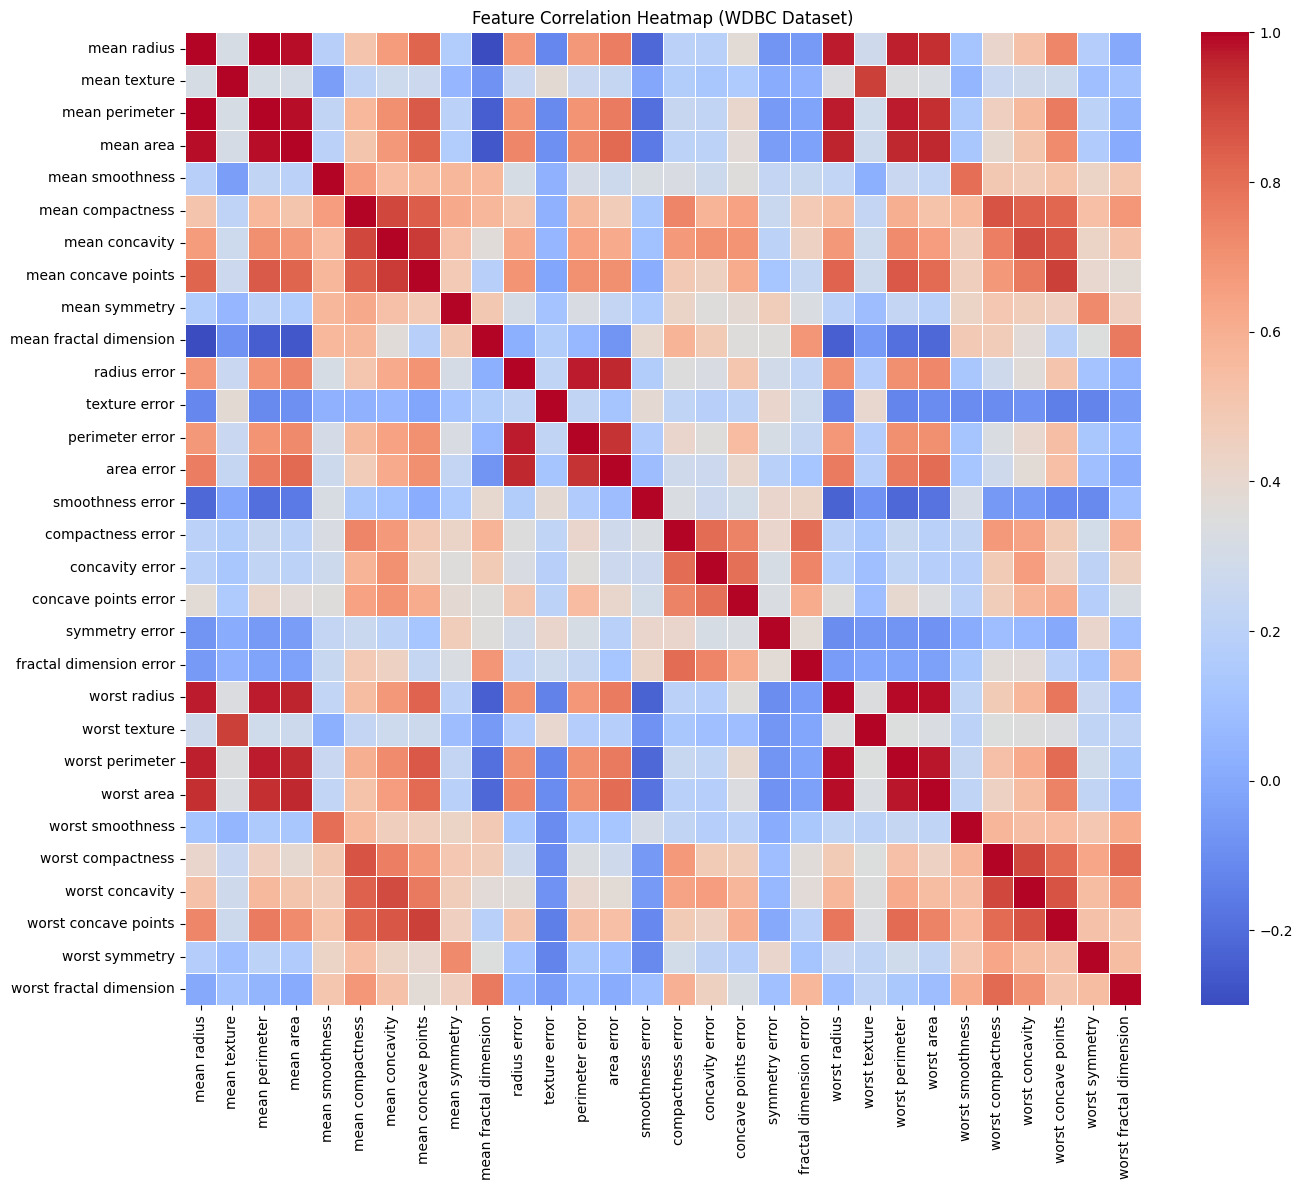

In [7]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    linewidths=0.5,
    cbar=True
)

plt.title("Feature Correlation Heatmap (WDBC Dataset)")
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300)
plt.show()

In [9]:
# Upper triangle of correlation matrix
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Correlation threshold
corr_threshold = 0.9

# Columns to drop
to_drop = [
    column for column in upper_triangle.columns
    if any(upper_triangle[column] > corr_threshold)
]

print("Original feature count:", len(feature_names))
print("Features to drop:", len(to_drop))
print(to_drop)

Original feature count: 30
Features to drop: 10
['mean perimeter', 'mean area', 'mean concave points', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concave points']


In [10]:
# Convert scaled arrays to DataFrame for pruning
X_train_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_df = pd.DataFrame(X_test_scaled, columns=feature_names)

# Drop correlated features
X_train_reduced = X_train_df.drop(columns=to_drop).values
X_test_reduced = X_test_df.drop(columns=to_drop).values

print("Reduced train shape:", X_train_reduced.shape)
print("Reduced test shape :", X_test_reduced.shape)

Reduced train shape: (455, 20)
Reduced test shape : (114, 20)


In [11]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)

    print(f"\n{model_name}")
    print(f"Accuracy          : {acc:.4f}")
    print(f"F1 Score          : {f1:.4f}")
    print(f"Balanced Accuracy : {bal_acc:.4f}")

    return {
        "Model": model_name,
        "Accuracy": acc,
        "F1": f1,
        "Balanced Accuracy": bal_acc
    }

In [12]:
results = []

# Linear SVM
linear_svm = SVC(kernel="linear", C=1.0)
results.append(
    evaluate_model(
        linear_svm,
        X_train_reduced,
        X_test_reduced,
        y_train,
        y_test,
        model_name="Linear SVM"
    )
)


Linear SVM
Accuracy          : 0.9825
F1 Score          : 0.9861
Balanced Accuracy : 0.9812


Without pruning:

In [13]:
results_full = []

# Linear SVM (no pruning)
linear_svm_full = SVC(kernel="linear", C=1.0)
results_full.append(
    evaluate_model(
        linear_svm_full,
        X_train_scaled,
        X_test_scaled,
        y_train,
        y_test,
        model_name="Linear SVM (Full Features)"
    )
)


Linear SVM (Full Features)
Accuracy          : 0.9737
F1 Score          : 0.9790
Balanced Accuracy : 0.9742


In [16]:
# Re-train the best model (Linear SVM on pruned features)
best_model = SVC(kernel="linear", C=1.0)
best_model.fit(X_train_reduced, y_train)

# Predictions
y_pred_best = best_model.predict(X_test_reduced)

In [17]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
cm

array([[41,  1],
       [ 1, 71]])

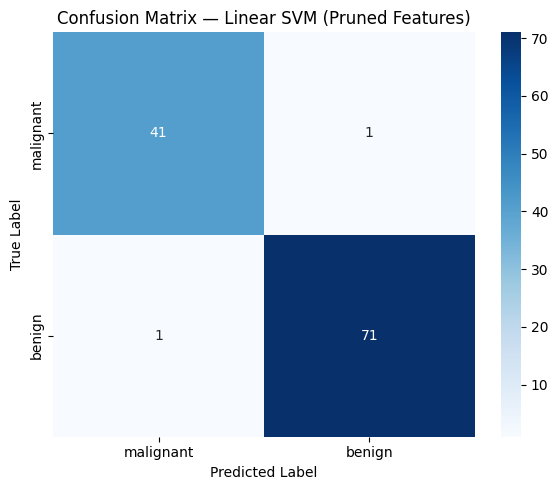

In [18]:
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=target_names,
    yticklabels=target_names
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix — Linear SVM (Pruned Features)")
plt.tight_layout()
plt.savefig("confusion_matrix_linear_pruned.png", dpi=300)
plt.show()